**Importing the Libraries**

In [1657]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Loading the Csv File**


In [1658]:
df = pd.read_csv('/content/train-chennai-sale.csv')
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


**Dropping columns which is not neccesary**

In [1659]:
df = df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)

In [1660]:
df.head(5)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


**Handling missing Values**

In [1661]:
# Checking for Null Values
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

**Filling the Null Values**

In [1662]:
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [1663]:
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0],inplace=True)

In [1664]:
df['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [1665]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0],inplace=True)

In [1666]:
df['QS_OVERALL'].value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
2.545     1
2.110     1
3.965     1
4.345     1
4.940     1
Name: QS_OVERALL, Length: 479, dtype: int64

In [1667]:
df['QS_OVERALL'].fillna(df['QS_OVERALL'].median(),inplace=True)

In [1668]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

**Droping the duplicates**

In [1669]:
df = df.drop_duplicates()

In [1670]:
df.head(2)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770


**Checking Datatypes**

In [1671]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

**Fixing the Datatype in correct Manner**

In [1672]:
df.N_BEDROOM = df.N_BEDROOM.astype(int)
df.N_BATHROOM = df.N_BATHROOM.astype(int)
df.DATE_SALE = pd.to_datetime(df.DATE_SALE, format='%d-%m-%Y')
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD, format='%d-%m-%Y')

**Creating AGE column which can deternine how old the property** **is** 

In [1673]:
df['AGE'] = pd.DatetimeIndex(df['DATE_SALE']).year - pd.DatetimeIndex(df['DATE_BUILD']).year

In [1674]:
df.head(10)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,2012-02-04,70,1,1,3,AbNormal,Yes,1992-02-09,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30
5,Chrompet,1220,2014-09-11,36,2,1,4,Partial,No,2009-09-12,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,12394750,5
6,Chrompet,1167,2007-04-05,137,1,1,3,Partial,No,1979-04-12,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,8488790,28
7,Velachery,1847,2006-03-13,176,3,2,5,Family,No,1996-03-15,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,16800250,10
8,Chrompet,771,2011-04-06,175,1,1,2,AdjLand,No,1977-04-14,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,8308970,34
9,Velachery,1635,2006-06-22,74,2,1,4,AbNormal,No,1991-06-26,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,8083650,15


In [1675]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503232,1.089491e+07,24.276270
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,3.768603e+06,12.334164
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,1.299390e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,55.000000


**Checking for Outliers**

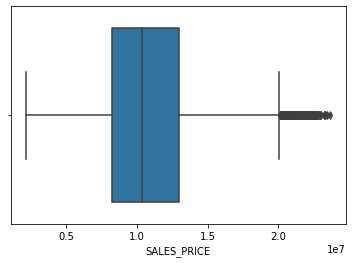

In [1676]:
sns.boxplot(df['SALES_PRICE'])

There is No need to correct outliers i.e House sales will be more than 2 crore

**Interquartile Range**

In [1677]:
IQR25 = df['SALES_PRICE'].quantile(0.25)
IQR75 = df['SALES_PRICE'].quantile(0.75)
print(IQR75-IQR25)

4721800.0


**Finding MAX & MIN Values**

In [1678]:
max = IQR75 + 1.5 * (IQR75-IQR25)
min = IQR25 - 1.5 * (IQR75-IQR25)
print(max)
print(min)

20076600.0
1189400.0


**Correcting the Categorical columns**

In [1679]:
# checking unique elements in AREA
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [1680]:
# correcting the spelling mistakes in AREA
df.AREA.replace(['Karapakkam'],'Karapakam',inplace=True)
df.AREA.replace(['Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
df.AREA.replace(['Adyr'],'Adyar',inplace=True)
df.AREA.replace(['Velchery'],'Velachery',inplace=True)
df.AREA.replace(['Chrompet','Chrompt', 'Chrmpet'],'Chormpet',inplace=True)
df.AREA.replace(['KKNagar'],'KK Nagar',inplace=True)
df.AREA.replace(['TNagar'],'T Nagar',inplace=True)

In [1681]:
df.AREA.unique()

array(['Karapakam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chormpet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [1682]:
# checking unique elements in SALE_COND
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [1683]:
# correcting the spelling mistakes in SALE_COND
df.SALE_COND.replace(['Adj Land'],'AdjLand',inplace=True)
df.SALE_COND.replace(['Ab Normal'],'AbNormal',inplace=True)
df.SALE_COND.replace(['Partiall','PartiaLl'],'Partial',inplace=True)

In [1684]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [1685]:
# checking unique elements in PARK_FACIL
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [1686]:
# correcting the spelling mistakes in PARK_FACIL
df.PARK_FACIL.replace(['Noo'],'No',inplace=True)

In [1687]:
df.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [1688]:
# checking unique elements in BUILDTYPE
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [1689]:
df.BUILDTYPE.replace(['Others'],'Other',inplace=True)
df.BUILDTYPE.replace(['Comercial'],'Commercial',inplace=True)

In [1690]:
df.BUILDTYPE.unique()

array(['Commercial', 'Other', 'House'], dtype=object)

In [1691]:
# checking unique elements in UTILITY_AVAIL
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [1692]:
# correcting the spelling mistakes in UTILITY_AVAIL
df.UTILITY_AVAIL.replace(['All Pub'],'AllPub',inplace=True)
df.UTILITY_AVAIL.replace(['NoSewr '],'NoSeWa',inplace=True)

In [1693]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSeWa'], dtype=object)

In [1694]:
# checking unique elements in STREET
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [1695]:
# correcting the spelling mistakes in STREET
df.STREET.replace(['Pavd'],'Paved',inplace=True)
df.STREET.replace(['NoAccess'], 'No Access',inplace=True)

In [1696]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [1697]:
# checking unique elements in MZZONE
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

**EXPLORATORY DATA ANALYSIS**

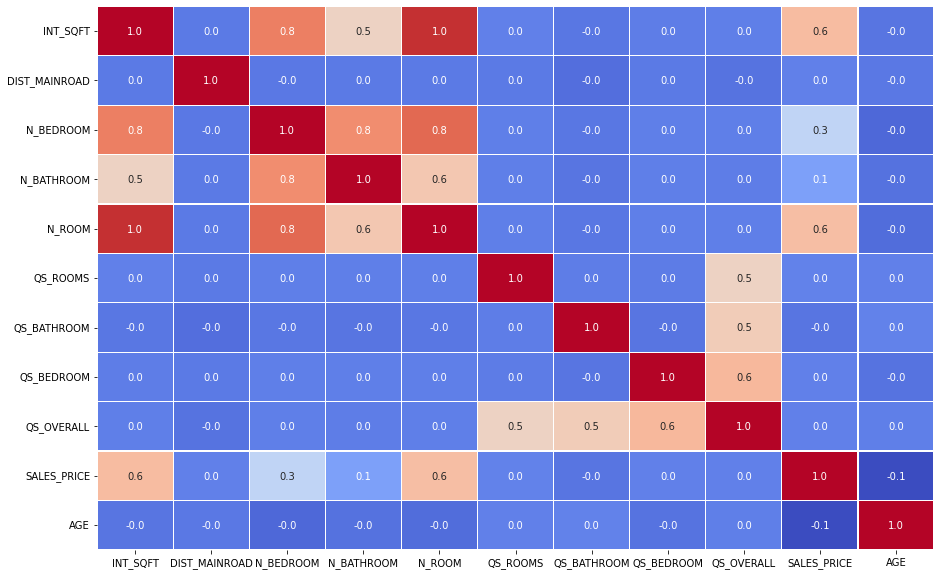

In [1698]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

We can see that in numerical columns there are some correlation between target and features

**Catagorical columns**

In [1699]:
# Checking Realtionship between Area and Sales price
area_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']

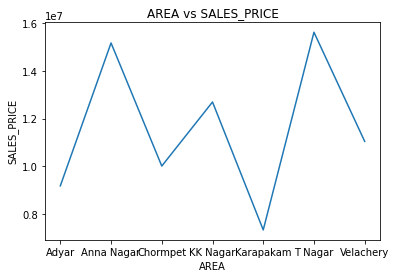

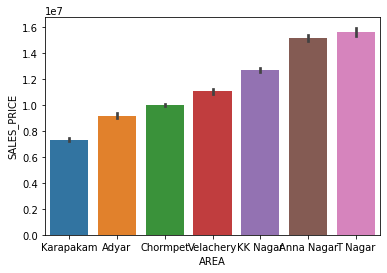

In [1700]:
df.groupby('AREA')['SALES_PRICE'].mean().plot()
plt.title('AREA vs SALES_PRICE')
plt.xlabel('AREA')
plt.ylabel('SALES_PRICE')
plt.show()

sns.barplot(x='AREA',y='SALES_PRICE',data=df,order = area_order)

1. There is a Linear relationship between Area and Sales price will go for label 
encoding
2. T Nagar has the highest sales in terms of Area

In [1701]:
# Checking Realtionship between SALE_COND and Sales price
sale_cond_order = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']

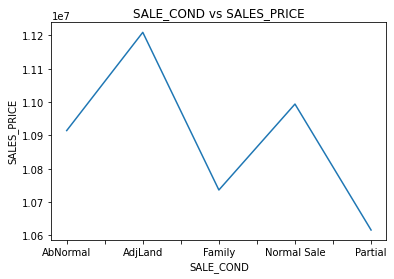

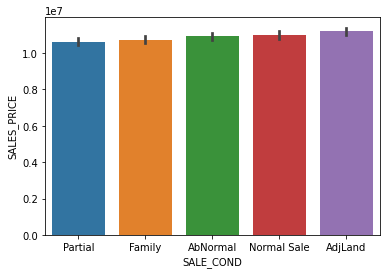

In [1702]:
df.groupby('SALE_COND')['SALES_PRICE'].mean().plot()
plt.title('SALE_COND vs SALES_PRICE')
plt.xlabel('SALE_COND')
plt.ylabel('SALES_PRICE')
plt.show()

sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order=sale_cond_order)

There is no Linear relationship between Sales_cond and Sales price will drop this feature

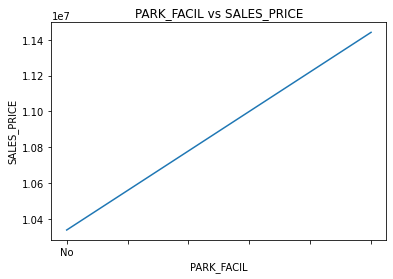

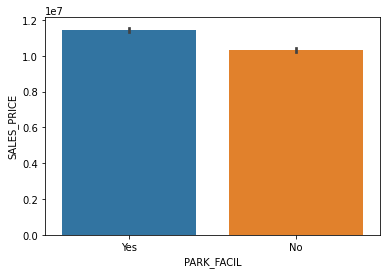

In [1703]:
# Checking Realtionship between PARK_FACIL and Sales price
df.groupby('PARK_FACIL')['SALES_PRICE'].mean().plot()
plt.title('PARK_FACIL vs SALES_PRICE')
plt.xlabel('PARK_FACIL')
plt.ylabel('SALES_PRICE')
plt.show()

sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)

1. There is a Linear relationship between PARK_FACIL and Sales price will go for label encoding
2. With Parking facilty is more costlier compared to No parking facility

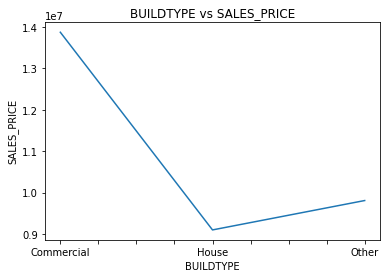

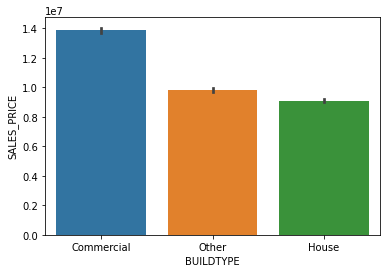

In [1704]:
# Checking Realtionship between BUILDTYPE and Sales price
df.groupby('BUILDTYPE')['SALES_PRICE'].mean().plot()
plt.title('BUILDTYPE vs SALES_PRICE')
plt.xlabel('BUILDTYPE')
plt.ylabel('SALES_PRICE')
plt.show()

sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df)

1. There is a no linear relationship between BUILDTYPE and Sales price will go for One Hot encoding
2. Commercial buildings are Costlier.

In [1705]:
# Checking Realtionship between UTILITY_AVAIL and Sales price
Utility_avail_order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']

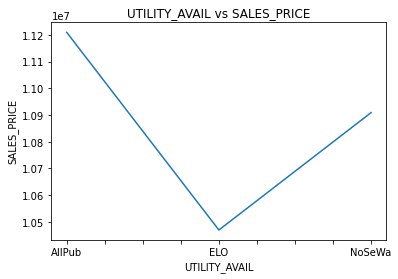

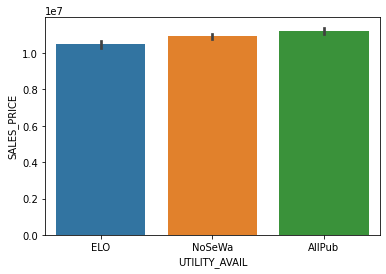

In [1706]:
df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().plot()
plt.title('UTILITY_AVAIL vs SALES_PRICE')
plt.xlabel('UTILITY_AVAIL')
plt.ylabel('SALES_PRICE')
plt.show()

sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=Utility_avail_order)

1. There is a Linear relationship between UTILITY_AVAIL and Sales price will go for label encoding
2. All Pub are Costlier

In [1707]:
# Checking Realtionship between STREET and Sales price
Street_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']

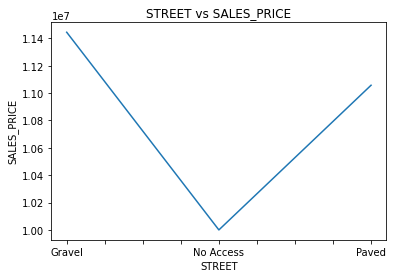

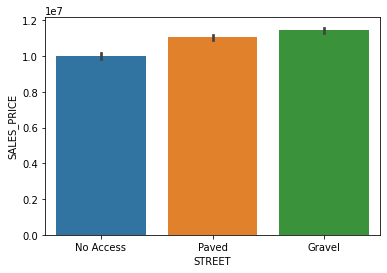

In [1708]:
df.groupby('STREET')['SALES_PRICE'].mean().plot()
plt.title('STREET vs SALES_PRICE')
plt.xlabel('STREET')
plt.ylabel('SALES_PRICE')
plt.show()

sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=Street_order)

1. There is a Linear relationship between Street and Sales price will go for label encoding
2. With Gravel street are costlier

In [1709]:
# Checking Realtionship between MZZONE and Sales price
Mzzone_order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']

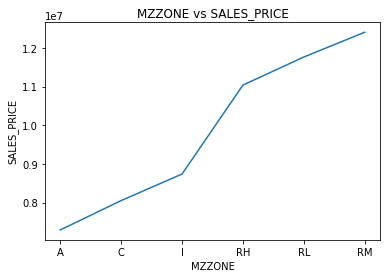

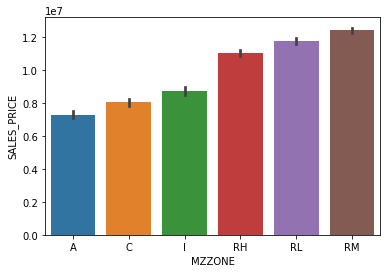

In [1710]:
df.groupby('MZZONE')['SALES_PRICE'].mean().plot()
plt.title('MZZONE vs SALES_PRICE')
plt.xlabel('MZZONE')
plt.ylabel('SALES_PRICE')
plt.show()

sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=Mzzone_order)

1. There is a Linear relationship between MZZONE and Sales price will go for label encoding
2. With MZZONE 'RM' is costlier than others

**Numerical columns**

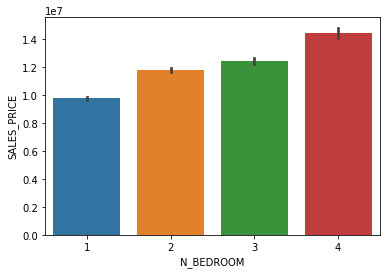

In [1711]:
# Checking Realtionship between N_BEDROOM  and Sales price

sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df)

We found a relation so this feature will be important

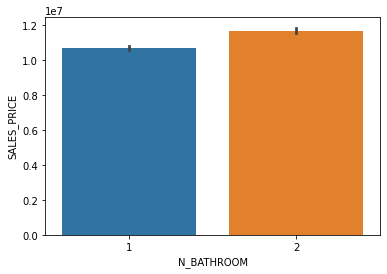

In [1712]:
# Checking Realtionship between N_BATHROOM and Sales price

sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df)

We found a relation so this feature will be important

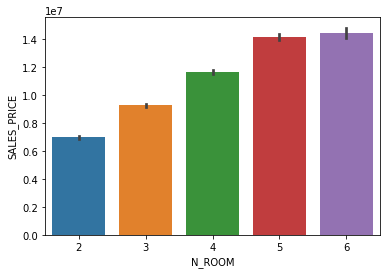

In [1713]:
# Checking Realtionship between N_ROOM and Sales price
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df)

We found a relation so this feature will be important

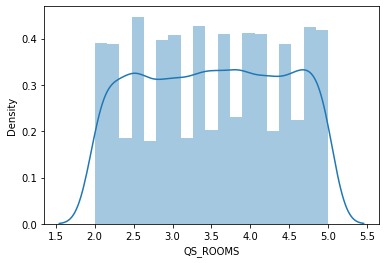

In [1714]:
sns.distplot(df['QS_ROOMS'])

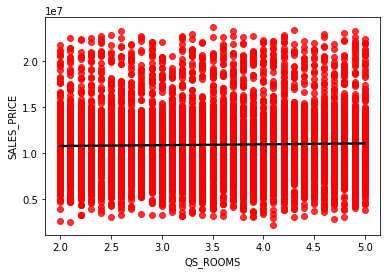

In [1715]:
sns.regplot(df.QS_ROOMS, df.SALES_PRICE, scatter_kws={"color": "red"}, line_kws={"color": "black"})

There is no relation so this feature will be Dropped

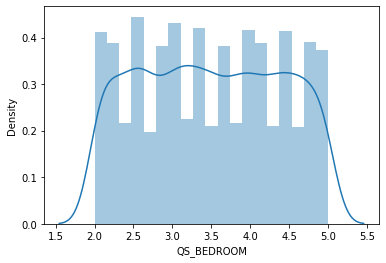

In [1716]:
sns.distplot(df['QS_BEDROOM'])

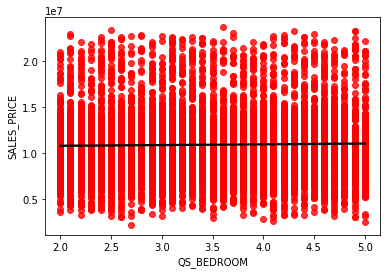

In [1717]:
sns.regplot(df.QS_BEDROOM, df.SALES_PRICE, scatter_kws={"color": "red"}, line_kws={"color": "black"})

There is no relation so this feature will be Dropped

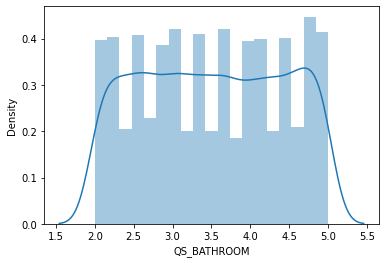

In [1718]:
sns.distplot(df['QS_BATHROOM'])

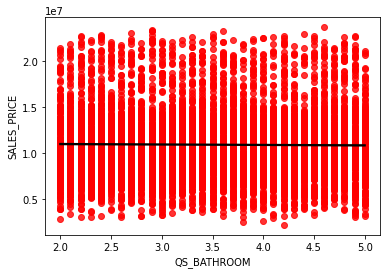

In [1719]:
sns.regplot(df.QS_BATHROOM, df.SALES_PRICE, scatter_kws={"color": "red"}, line_kws={"color": "black"})

There is no relation so this feature will be Dropped

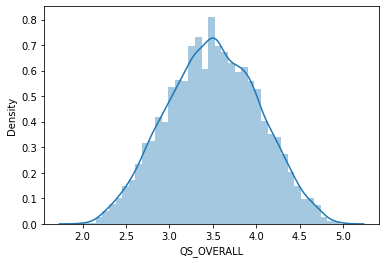

In [1720]:
sns.distplot(df['QS_OVERALL'])

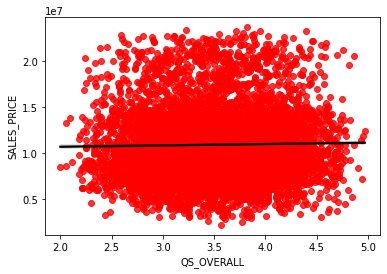

In [1721]:
sns.regplot(df.QS_OVERALL, df.SALES_PRICE, scatter_kws={"color": "red"}, line_kws={"color": "black"})

There is no relation so this feature will be Dropped

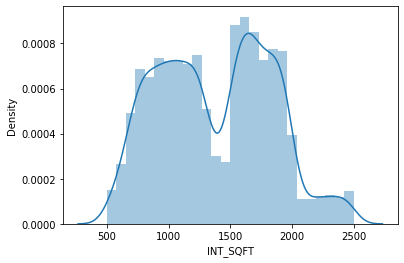

In [1722]:
sns.distplot(df['INT_SQFT'])

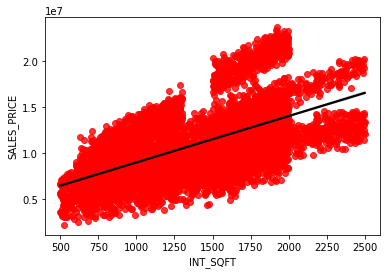

In [1723]:
sns.regplot(df.INT_SQFT, df.SALES_PRICE, scatter_kws={"color": "red"}, line_kws={"color": "black"})

We found a relation so this feature will be important

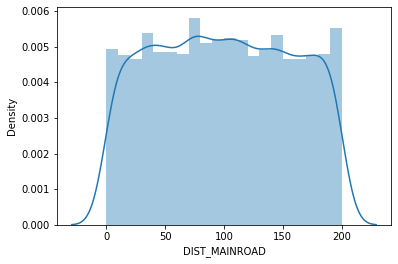

In [1724]:
sns.distplot(df['DIST_MAINROAD'])

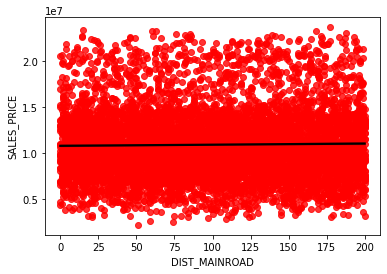

In [1725]:
sns.regplot(df.DIST_MAINROAD, df.SALES_PRICE, scatter_kws={"color": "red"}, line_kws={"color": "black"})

There is no relation so this feature will be Dropped

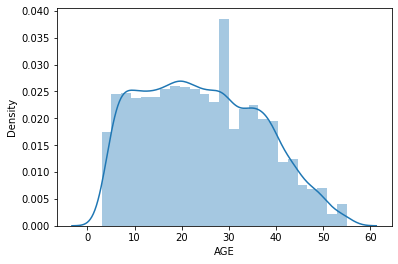

In [1726]:
sns.distplot(df['AGE'])

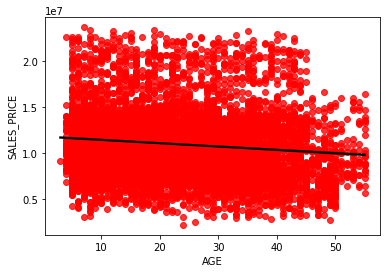

In [1727]:
sns.regplot(df.AGE, df.SALES_PRICE, scatter_kws={"color": "red"}, line_kws={"color": "black"})

We found a relation so this feature will be important

**Removing unnecessary columns for Encoding**

In [1728]:
df.drop(['QS_OVERALL','DIST_MAINROAD','QS_ROOMS','QS_BEDROOM','QS_BATHROOM','DATE_BUILD','DATE_SALE','SALE_COND'],axis=1,inplace=True)

In [1729]:
df.head(10)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,Karapakam,1004,1,1,3,Yes,Commercial,AllPub,Paved,A,7600000,44
1,Anna Nagar,1986,2,1,5,No,Commercial,AllPub,Gravel,RH,21717770,11
2,Adyar,909,1,1,3,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,Velachery,1855,3,2,5,No,Other,NoSeWa,Paved,I,9630290,22
4,Karapakam,1226,1,1,3,Yes,Other,AllPub,Gravel,C,7406250,30
5,Chormpet,1220,2,1,4,No,Commercial,NoSeWa,No Access,RH,12394750,5
6,Chormpet,1167,1,1,3,No,Other,AllPub,No Access,RL,8488790,28
7,Velachery,1847,3,2,5,No,Commercial,AllPub,Gravel,RM,16800250,10
8,Chormpet,771,1,1,2,No,Other,NoSeWa,Paved,RM,8308970,34
9,Velachery,1635,2,1,4,No,Other,ELO,No Access,I,8083650,15


In [1730]:
df.describe()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALES_PRICE,AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,1.636939,1.213110,3.688704,1.089491e+07,24.276270
std,457.410902,0.802881,0.409534,1.019099,3.768603e+06,12.334164
min,500.000000,1.000000,1.000000,2.000000,2.156875e+06,3.000000
25%,993.000000,1.000000,1.000000,3.000000,8.272100e+06,14.000000
50%,1373.000000,1.000000,1.000000,4.000000,1.033505e+07,23.000000
75%,1744.000000,2.000000,1.000000,4.000000,1.299390e+07,34.000000
max,2500.000000,4.000000,2.000000,6.000000,2.366734e+07,55.000000


**Encoding**

In [1731]:
# Label Encoding
# Encoding the area column
df.AREA = df.AREA.map({'Karapakam':0,
                       'Adyar':1,
                       'Chormpet':2,
                       'Velachery':3,
                       'KK Nagar':4,
                       'Anna Nagar':5,
                       'T Nagar':6})

In [1732]:
# Encoding the park_facil column
df.PARK_FACIL = df.PARK_FACIL.map({'Yes':0,
                                       'No':1})

In [1733]:
# Encoding the utility_avail column
df.UTILITY_AVAIL = df.UTILITY_AVAIL.map({'ELO' : 0,
                                         'NoSeWa' : 1,
                                         'AllPub' : 2})

In [1734]:
# Encoding the street column
df.STREET = df.STREET.map({'No Access' : 0,
                               'Paved' : 1, 
                               'Gravel' : 2})

In [1735]:
# Encoding the mzzone column 
df.MZZONE = df.MZZONE.map({'A' : 0,
                               'C' : 1,
                               'I' : 2,
                               'RH' : 3,
                               'RL' : 4,
                               'RM' : 5})

In [1736]:
# one hot encoding for BuildType
df = pd.get_dummies(df,columns=['BUILDTYPE'])

In [1737]:
df.head(10)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,0,1004,1,1,3,0,2,1,0,7600000,44,1,0,0
1,5,1986,2,1,5,1,2,2,3,21717770,11,1,0,0
2,1,909,1,1,3,0,0,2,4,13159200,20,1,0,0
3,3,1855,3,2,5,1,1,1,2,9630290,22,0,0,1
4,0,1226,1,1,3,0,2,2,1,7406250,30,0,0,1
5,2,1220,2,1,4,1,1,0,3,12394750,5,1,0,0
6,2,1167,1,1,3,1,2,0,4,8488790,28,0,0,1
7,3,1847,3,2,5,1,2,2,5,16800250,10,1,0,0
8,2,771,1,1,2,1,1,1,5,8308970,34,0,0,1
9,3,1635,2,1,4,1,0,0,2,8083650,15,0,0,1


In [1738]:
df.dtypes

AREA                    int64
INT_SQFT                int64
N_BEDROOM               int64
N_BATHROOM              int64
N_ROOM                  int64
PARK_FACIL              int64
UTILITY_AVAIL           int64
STREET                  int64
MZZONE                  int64
SALES_PRICE             int64
AGE                     int64
BUILDTYPE_Commercial    uint8
BUILDTYPE_House         uint8
BUILDTYPE_Other         uint8
dtype: object

**SUPERVISED REGRESSION PROBLEM**
We have the target variable "SALES_PRICE" and the type of Target variable is continuous. We are Predicting a continuous value.

**Importing the Libraries**

In [1739]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn import tree
import xgboost as xg
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [1740]:
scaler=StandardScaler()
minmax=MinMaxScaler()

In [1741]:
X = df.drop('SALES_PRICE',axis=1)
y = df['SALES_PRICE']

In [1742]:
# Splitting
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [1743]:
# Scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**LINEAR REGRESSION**

In [1744]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9167193473150832


In [1745]:
# With Cross validation
lr_model=LinearRegression()
CV_Linear_regression = cross_val_score(lr_model,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an Linear_Regression model is:",CV_Linear_regression)

The cross_validation score of an Linear_Regression model is: 0.9199234394602781


**KNN**

In [1755]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_predknn))

R2- SCORE: 0.44307012317069194


In [1756]:
for i in [1,2,3,4,5,6,7,8,9,10]:
  knn = KNeighborsRegressor(i)
  knn.fit(X_train_scaled,y_train)
  print("k value : ", i, "train score : ",knn.score(X_train_scaled,y_train), "score : ",np.mean(cross_val_score(knn,X_train_scaled,y_train,cv=10)))

k value :  1 train score :  0.9999970267942916 score :  0.9375023693774447
k value :  2 train score :  0.9851884207369954 score :  0.9499424060656219
k value :  3 train score :  0.9786819612380437 score :  0.9527614159572607
k value :  4 train score :  0.9746537257212987 score :  0.9533670466141702
k value :  5 train score :  0.9714808815335229 score :  0.953642383255089
k value :  6 train score :  0.9692913833556204 score :  0.9531576494592328
k value :  7 train score :  0.9676162418101931 score :  0.9527497009807672
k value :  8 train score :  0.9660299259870504 score :  0.9522321838160112
k value :  9 train score :  0.9643325294125211 score :  0.9513696775181633
k value :  10 train score :  0.9626586923935884 score :  0.9505331453378817


In [1757]:
# With Cross validation
CV_knn = cross_val_score(knn,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an KNN is:",CV_knn)

The cross_validation score of an KNN is: 0.9505331453378817


**DECISION TREE**

In [1758]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))

R2- SCORE: 0.9730249147855443


In [1759]:
# With Cross validation
CV_DecissionTree = cross_val_score(dt,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an DecissionTree model is:",CV_DecissionTree)

The cross_validation score of an DecissionTree model is: 0.9725523672291112


**XGBOOST**

In [1746]:
# xg_model = XGBRegressor()
xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                )
xg_model.fit(X_train_scaled,y_train)
xg_y_pred=xg_model.predict(X_test_scaled)
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))

[10:19:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost model Rsquared metric: 0.9958181844706115


In [1747]:
# With Cross validation
CV_XG_Boost = cross_val_score(xg_model,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an XG_Boost model is:",CV_XG_Boost)

[10:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:19:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:20:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:20:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:21:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:21:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

**RANDOM FOREST**

In [1748]:
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random forest Regressor model Rsquared metric",r2_score(y_test,rf_pred))

Random forest Regressor model Rsquared metric 0.8733452467440321


In [1749]:
# With Cross validation
CV_RandomForest = cross_val_score(rf,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an XG_Boost model is:",CV_RandomForest)

The cross_validation score of an XG_Boost model is: 0.8700539664197182


**R_SQUARED_SCORES**

*   The score of an LINEAR REGRESSION model is : **0.9167193473150832**
*   The score of an XGBOOST model is : **0.9958181844706115**
*   The score of an RANDOM FOREST model is : **0.8733452467440321**
*   The score of an KNN model is : **0.44307012317069194**
*   The score of an Decission Tree model is : **0.9730249147855443**

**R_SQUARED_SCORES**

*   The cross_validation score of an LINEAR REGRESSION model is : **0.9199234394602781**
*   The cross_validation score of an XGBOOST model is : **0.99573147754153**
*   The cross_validation score of an RANDOM FOREST model is :  **0.8700539664197182**
*   The cross_validation score of an KNN model is :**0.9505331453378817**
*   The cross_validation score of an Decission Tree model is : **0.9725523672291112**

**BEST MODEL**

* XGBoost model give me the high accuracy

